**Bank Marketing Campaign Success Prediction using Logistic Regression**

Import Librares

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score, confusion_matrix, classification_report, roc_curve, roc_auc_score

Load Dataset

In [2]:
data=pd.read_csv('/content/drive/MyDrive/data/bank.csv')
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


Show first 20 data

In [4]:
data.head(20)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
6,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,yes
7,60,retired,divorced,secondary,no,545,yes,no,unknown,6,may,1030,1,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
9,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,yes


Check for Missing values and dupliicates

In [5]:
data.isnull().sum()

,0
age,0
job,0
marital,0
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


In [6]:
data.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
11157,False
11158,False
11159,False
11160,False


Convert categorical data to numerical.
Label Encoder- is used

In [7]:
#Encode Categorical features
le=LabelEncoder()
for col in data.columns:
  if data[col].dtype=="object":
    data[col]=le.fit_transform(data[col])

Split Data

In [8]:
x=data.drop('deposit',axis=1)
y=data['deposit']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

Feature Scaling

In [9]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

Train Model

In [10]:
model = LogisticRegression(max_iter = 1000)
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

Predction

In [24]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test)[:,1]

#to Increase the precision
for t in [0.55, 0.60, 0.65, 0.70]:
    y_pred_temp = (y_prob >= t).astype(int)
    print(t, "Precision:", precision_score(y_test, y_pred_temp))


0.55 Precision: 0.8177842565597667
0.6 Precision: 0.8285714285714286
0.65 Precision: 0.8403669724770643
0.7 Precision: 0.857292759706191


Evaluaton

In [25]:
print("Accuracy:",accuracy_score(y_test,y_pred_temp))
print("Precision:", precision_score(y_test, y_pred_temp))
print("Recall:", recall_score(y_test, y_pred_temp))
print("Classifcaton Report:",classification_report(y_test,y_pred_temp))


Accuracy: 0.723499552105106
Precision: 0.857292759706191
Recall: 0.5084007467330429
Classifcaton Report:               precision    recall  f1-score   support

           0       0.67      0.92      0.78      1742
           1       0.86      0.51      0.64      1607

    accuracy                           0.72      3349
   macro avg       0.76      0.72      0.71      3349
weighted avg       0.76      0.72      0.71      3349



Confusion Matrix


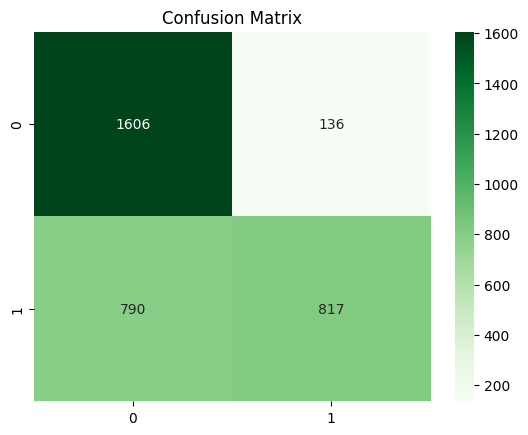

In [26]:
cm=confusion_matrix(y_test,y_pred_temp)
sns.heatmap(cm,annot=True ,fmt='d',cmap='Greens')
plt.title('Confusion Matrix')
plt.show()

ROC Curve

AUC Score: 0.8677210139051522


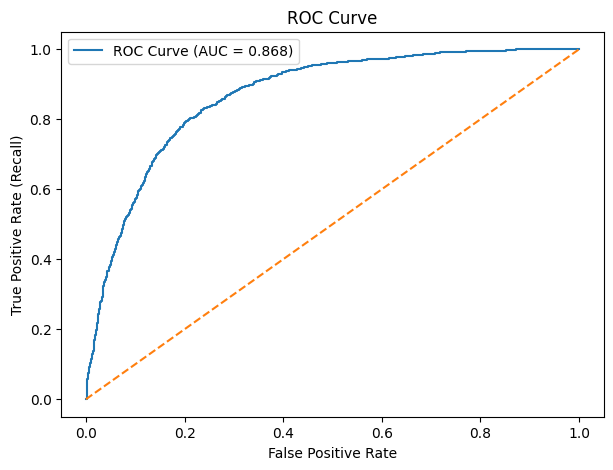

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)
print("AUC Score:", auc_score)
plt.figure(figsize=(7,5))
plt.plot(fpr, tpr, label="ROC Curve (AUC = {:.3f})".format(auc_score))
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve")
plt.legend()
plt.show()